In [1]:
import numpy as np
import pandas as pd
from pandas import DataFrame, Series
import matplotlib.pyplot as plt

# Pandas fillna() to fill forward and/or backward

https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.fillna.html

In [2]:
def get_data(symbols, dates):
    df = DataFrame(index=dates)
    if 'SPY' not in symbols:  # add SPY for reference, if absent
        symbols.insert(0, 'SPY')
    for symbol in symbols:
        df_temp = pd.read_csv(f"data/{symbol}.csv", index_col='Date',
            parse_dates=True, usecols=['Date', 'Adj Close'], na_values=['nan']
            ).rename(columns={'Adj Close': symbol})
        df = df.join(df_temp)
        if symbol == 'SPY':
            df = df.dropna(subset=["SPY"])
    return df

def plot_data(df, title="Stock prices"):
    """Plot stock prices with a custom title and meaningful axis labels."""
    ax = df.plot(title=title, fontsize=12)
    ax.set_xlabel("Date")
    ax.set_ylabel("Price")
    plt.show()

In [14]:
symbols = ['FAKE2', 'JAVA', 'FAKE1']
start_date = '2005-12-31'
end_date = '2014-12-07'
idx = pd.date_range(start_date, end_date)
df_data = get_data(symbols, idx)

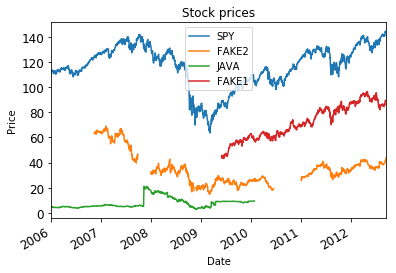

In [15]:
plot_data(df_data)

## lets fill the data going forward: fill missing gaps in between

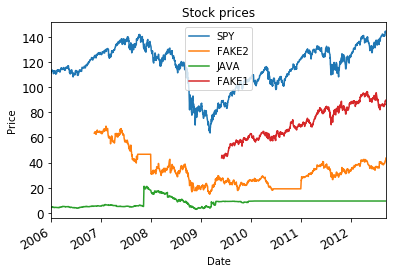

In [16]:
df_data.fillna(method='ffill', inplace=True)
plot_data(df_data)

## lets fill the data going backward: start to inception of stock

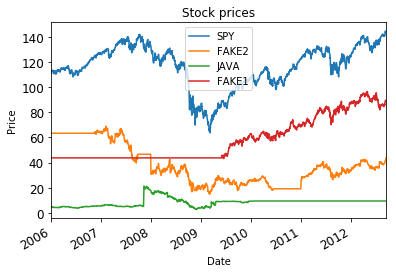

In [17]:
df_data.fillna(method='bfill', inplace=True)
plot_data(df_data)

# Important: do forward fill false then backward

if you do backward first then, future price will fill in the gaps in between which is not what we want!